In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
tb = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-11-16_clean.csv')
tb.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [3]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb.to_sql('tb_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_data
          ''')

df = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [8]:
sex_2020 = df.pivot_table(index=["country"], columns = ['sex'],aggfunc={'best':'mean'})
sex_2020

best               \
sex                                                            a            f   
country                                                                         
Afghanistan                                         25197.142857  9151.769231   
Albania                                               142.750000    30.785714   
Algeria                                              7252.500000  2560.000000   
American Samoa                                          0.666667     0.272727   
Andorra                                                 2.000000     0.214286   
...                                                          ...          ...   
Wallis and Futuna Islands                               0.666667     0.000000   
Yemen                                                4508.750000  1475.214286   
Zambia                                              23100.000000  5013.571429   
Zimbabwe                                            11862.500000  2564.714286   
occupied Palestinian territory, including east ...     17.333333     2.727273   

                                                                 
sex                                                           m  
country                                                          
Afghanistan                                         7742.307692  
Albania                                               81.428571  
Algeria                                             3475.714286  
American Samoa                                         0.272727  
Andorra                                                1.000000  
...                                                         ...  
Wallis and Futuna Islands                              0.272727  
Yemen                                               1639.714286  
Zambia                                              8657.142857  
Zimbabwe                                            4115.714286  
occupied Palestinian territory, including east ...     4.454545  

[214 rows x 3 columns]

In [10]:
best_estimate_tb_sex_2020 = sex_2020['best']
best_estimate_tb_sex_2020 

sex,a,f,m
country,,,
Afghanistan,25197.142857,9151.769231,7742.307692
Albania,142.750000,30.785714,81.428571
Algeria,7252.500000,2560.000000,3475.714286
American Samoa,0.666667,0.272727,0.272727
Andorra,2.000000,0.214286,1.000000
...,...,...,...
Wallis and Futuna Islands,0.666667,0.000000,0.272727
Yemen,4508.750000,1475.214286,1639.714286
Zambia,23100.000000,5013.571429,8657.142857


In [11]:
gender_2020 = pd.DataFrame()
gender_2020['Male'] = best_estimate_tb_sex_2020['m']
gender_2020['Female'] = best_estimate_tb_sex_2020['f']
gender_2020

,Male,Female
country,,
Afghanistan,7742.307692,9151.769231
Albania,81.428571,30.785714
Algeria,3475.714286,2560.000000
American Samoa,0.272727,0.272727
Andorra,1.000000,0.214286
...,...,...
Wallis and Futuna Islands,0.272727,0.000000
Yemen,1639.714286,1475.214286
Zambia,8657.142857,5013.571429


In [13]:
gender_affected_2020 = gender_2020.mean()
gender_affected_2020

Male      6789.697948
Female    3905.335126
dtype: float64

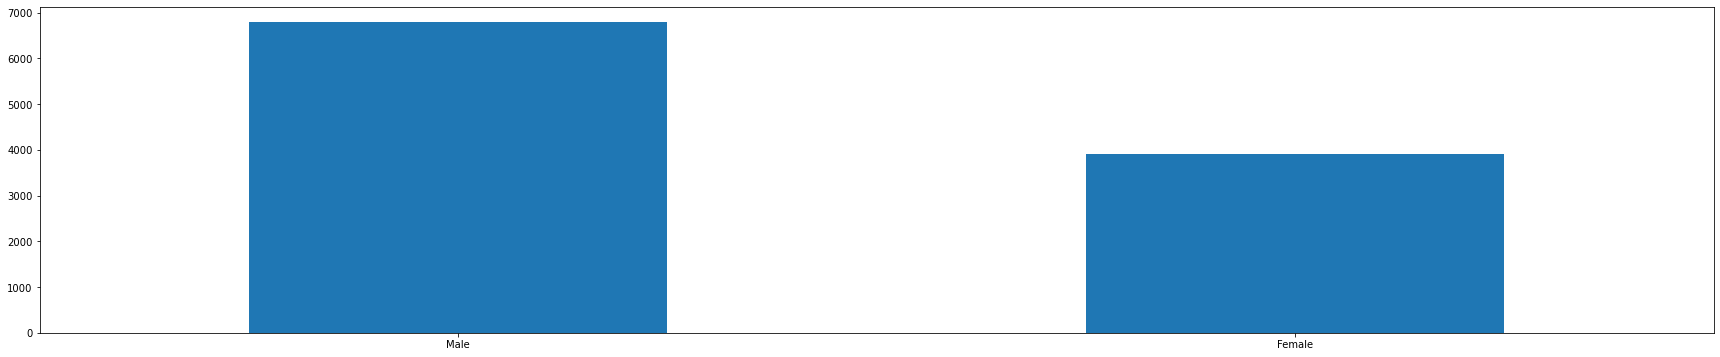

In [14]:
ax = gender_affected_2020.plot.bar(rot=0, figsize=(30, 6))

In [15]:
tb_2019 = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-06-14_clean.csv')
tb_2019.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
3,Afghanistan,AF,AFG,4,2018,inc,num,0-4,f,all,2700,0.0,6700.0
4,Afghanistan,AF,AFG,4,2018,inc,num,0-4,m,all,3200,0.0,8100.0


In [16]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_2019_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb_2019.to_sql('tb_2019_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_2019_data
          ''')

df_2019 = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df_2019.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
3,Afghanistan,AF,AFG,4,2018,inc,num,0-4,f,all,2700,0.0,6700.0
4,Afghanistan,AF,AFG,4,2018,inc,num,0-4,m,all,3200,0.0,8100.0


In [17]:
sex_2019 = df_2019.pivot_table(index=["country"], columns = ['sex'],aggfunc={'best':'mean'})
sex_2019

best                          
sex                                   a            f            m
country                                                          
Afghanistan                24554.285714  8412.846154  8036.153846
Albania                      156.750000    29.071429    91.285714
Algeria                     8211.250000  2814.076923  3943.571429
American Samoa                 0.000000     0.000000     0.000000
Andorra                        0.666667     0.000000     0.428571
...                                 ...          ...          ...
Wallis and Futuna Islands      0.000000     0.000000     0.000000
West Bank and Gaza Strip      25.333333     3.636364     6.363636
Yemen                       4502.500000  1439.571429  1645.142857
Zambia                     24650.000000  5037.142857  8764.285714
Zimbabwe                   12597.500000  2663.500000  4342.142857

[214 rows x 3 columns]

In [18]:
best_estimate_tb_sex_2019 = sex_2019['best']
best_estimate_tb_sex_2019 

sex,a,f,m
country,,,
Afghanistan,24554.285714,8412.846154,8036.153846
Albania,156.750000,29.071429,91.285714
Algeria,8211.250000,2814.076923,3943.571429
American Samoa,0.000000,0.000000,0.000000
Andorra,0.666667,0.000000,0.428571
...,...,...,...
Wallis and Futuna Islands,0.000000,0.000000,0.000000
West Bank and Gaza Strip,25.333333,3.636364,6.363636
Yemen,4502.500000,1439.571429,1645.142857


In [19]:
gender_2019 = pd.DataFrame()
gender_2019['Male'] = best_estimate_tb_sex_2019['m']
gender_2019['Female'] = best_estimate_tb_sex_2019['f']
gender_2019

,Male,Female
country,,
Afghanistan,8036.153846,8412.846154
Albania,91.285714,29.071429
Algeria,3943.571429,2814.076923
American Samoa,0.000000,0.000000
Andorra,0.428571,0.000000
...,...,...
Wallis and Futuna Islands,0.000000,0.000000
West Bank and Gaza Strip,6.363636,3.636364
Yemen,1645.142857,1439.571429


In [20]:
gender_affected_2019 = gender_2019.mean()
gender_affected_2019

Male      6948.065425
Female    3838.552449
dtype: float64

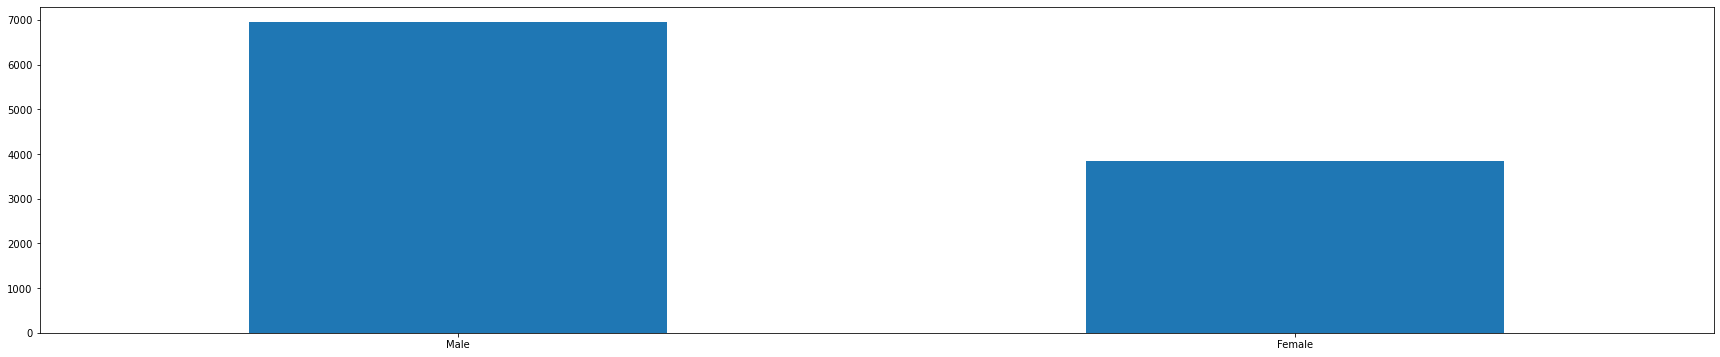

In [21]:
ax = gender_affected_2019.plot.bar(rot=0, figsize=(30, 6))

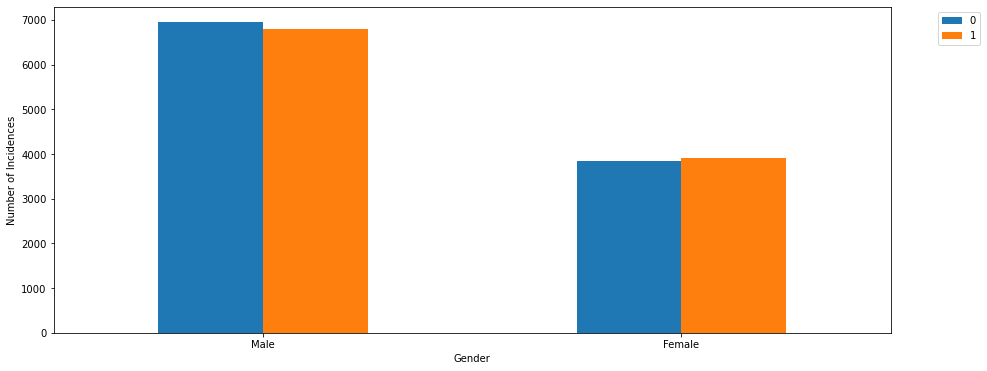

In [30]:
combined_gender_plot = pd.concat([gender_affected_2019, gender_affected_2020], axis=1)
# plot the DataFrame
combined_gender_plot.plot.bar(figsize=(15, 6))
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Number of Incidences')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [23]:
combined_gender_plot

,0,1
Male,6948.065425,6789.697948
Female,3838.552449,3905.335126


In [28]:
# Hypothesis Test
# H0 -  Null Hypothesis is that both men and women have same chance of occurence of TB
# H1 - The Alternative Hypothesis is that one of them has the most chance of occurence of TB.
from scipy.stats import ttest_ind

ttest_ind(gender_2020.Male, gender_2020.Female, equal_var=False)

Ttest_indResult(statistic=1.1979490752739865, pvalue=0.23177475813077883)

In [29]:
"""From the above test, The null hypothesis is not rejected because the p-value = 0.23 is greater than 0.05 """

'From the above test, The null hypothesis is not rejected because the p-value = 0.23 is greater than 0.05 '